In [ ]:
# x^n

In [ ]:
import os
import numpy as np
import seaborn as sns 
import pandas as pd
import scipy
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from matplotlib import pyplot as plt

#Function to read data from file
def get_data(din):
    bf = pd.read_csv(din,sep='\t')
    genes = bf['Hugo_Symbol']
    cols = list(bf.columns)
    cols.remove('Entrez_Gene_Id')
    cols.remove('Hugo_Symbol')
    bf = bf[cols]
    bf = bf.transpose()
    bf.columns = genes
    return bf

In [45]:
#function to clean data and arrange tha dataset in the explorable format

def readdata():
    opts = [['breast','brca'], ['liver','lihc'], ['lung','luad'],['prostate','prad'],['stomach','stad'],['thyroid','thca']]
    # opts = [ opts[-1] ] 
    dirin = 'data/'
    dataset = []
    for opt in opts:
        din1 = dirin + opt[0] + '-rsem-fpkm-gtex.txt'
        din2 = dirin + opt[1] + '-rsem-fpkm-tcga.txt'
        din3 = dirin + opt[1] + '-rsem-fpkm-tcga-t.txt'
        if os.path.isfile(din1) and os.path.isfile(din2) and os.path.isfile(din3):
            normal1 = get_data(din1)
            normal2 = get_data(din2)
            abnormal = get_data(din3)
                        
            common_gene = set(list(normal1.columns)).intersection(set(list(normal2.columns))).intersection(set(list(abnormal.columns)))
            common_gene = list(common_gene)
            
            normal1 = normal1[common_gene]
            normal2 = normal2[common_gene]
            abnormal = abnormal[common_gene]
            
            X_train = normal1.values
            X_test = pd.concat( [normal2, abnormal] ).values
            y_test = np.zeros(len(X_test), dtype=int)
            y_test[len(normal2):] = 1
            df = pd.DataFrame( X_train, columns = common_gene )
        dataset.append(df)
        
        #dataset[0]: breast
        #dataset[1]: liver
        #dataset[2]: lung
        #dataset[3]: prostate
        #dataset[4]: stomach
        #dataset[5]: thyroid
        
    return dataset

# Scrutinize the data

In [47]:
dataset = readdata()
opts = ['breast','liver','lung','prostate','stomach','thyroid']

for i in range(6):
    print(opts[i])
    print(dataset[i].head(3))
    print(dataset[i].tail(3))

breast
     IDH3G  OR8B3     EED  LHX1     AMZ2  PPP1R12B  KHDRBS3     ARSA  SHOX  \
0   575.03    0.0  733.19  1.81  2555.58   1044.52   122.64   656.11  0.43   
1  1268.46    0.0  327.56  0.00  4268.94    412.00   376.41   447.82  0.31   
2   921.88    0.0  587.13  0.00  1832.01   1127.35   591.22  1111.82  0.67   

   SH3BGRL2  ...    NPDC1  TNFAIP2     PEA15  CXorf27  ZNF639  FASTKD5   CST1  \
0    241.19  ...  1369.04  1721.16   2537.92      0.0  902.89   232.94   0.00   
1    738.29  ...   454.09  1437.15  10659.59      0.0  460.44   356.05   0.00   
2    339.14  ...   848.22  3467.27   3443.31      0.0  769.69   122.64  30.78   

   RTKN2    SRSF2    ATG7  
0  50.63  3235.01  483.38  
1   7.40  2417.67  406.31  
2  53.95  3395.89  514.56  

[3 rows x 19738 columns]
      IDH3G  OR8B3     EED  LHX1     AMZ2  PPP1R12B  KHDRBS3    ARSA  SHOX  \
86  1350.18    0.0  532.74  2.01  2303.12    896.64    67.59  543.96  0.00   
87   836.53    0.0  493.56  0.00  2090.03    669.92   511.00 

     NHLRC2    RNF11   RNF185    IDH3G  VSIG8  TMEM101  C22orf23  CCL15  \
315  144.01  2090.03   743.43  1350.18   1.97   842.36     71.50   0.00   
316  141.02  1304.15   947.83  1350.18   4.94   698.41     59.97   0.00   
317   87.65  2090.03  1111.82  1498.22   3.23   813.63    103.69   3.69   

     ADAMTSL4-AS1  TMEM155  ...    PAPLN       VIM  GEMIN6  NXPH2  CAMK1D  \
315          8.13     3.17  ...  1259.69  62865.33  195.72   1.22  674.59   
316         48.18     0.55  ...   642.59  38430.46  193.01   0.00  220.32   
317         10.55     1.64  ...   178.77  30999.42  218.79   0.00  212.78   

       SRSF2  KIAA0125    ATG7  SLC35F1  CTD-2192J16.22  
315  3665.02     53.19  400.71    35.76           47.17  
316  4769.75      0.00  314.17     6.62           59.97  
317  3491.39      2.66  341.51     7.75           41.52  

[3 rows x 19239 columns]


In [48]:
for i in range(6):
    print(opts[i], "Cancer dataset has shape ", dataset[i].shape)

breast Cancer dataset has shape  (89, 19738)
liver Cancer dataset has shape  (115, 18764)
lung Cancer dataset has shape  (313, 19648)
prostate Cancer dataset has shape  (106, 19046)
stomach Cancer dataset has shape  (192, 19969)
thyroid Cancer dataset has shape  (318, 19239)


In [50]:
for i in range(6):
    print("Information on ", opts[i], "Cancer dataset")
    print(dataset[i].info())
    print(" ")

Information on  breast Cancer dataset has shape 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Columns: 19738 entries, IDH3G to ATG7
dtypes: float64(19738)
memory usage: 13.4 MB
None
 
Information on  liver Cancer dataset has shape 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Columns: 18764 entries, NHLRC2 to CTD-2192J16.22
dtypes: float64(18764)
memory usage: 16.5 MB
None
 
Information on  lung Cancer dataset has shape 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Columns: 19648 entries, NHLRC2 to CTD-2192J16.22
dtypes: float64(19648)
memory usage: 46.9 MB
None
 
Information on  prostate Cancer dataset has shape 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Columns: 19046 entries, NHLRC2 to CTD-2192J16.22
dtypes: float64(19046)
memory usage: 15.4 MB
None
 
Information on  stomach Cancer dataset has shape 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Colu

In [51]:
for i in range(6):
    print("Data type of the ", opts[i], "Cancer dataset")
    print(dataset[i].dtypes)
    print(" ")

Data type of the  breast Cancer dataset has shape
IDH3G      float64
OR8B3      float64
EED        float64
LHX1       float64
AMZ2       float64
            ...   
FASTKD5    float64
CST1       float64
RTKN2      float64
SRSF2      float64
ATG7       float64
Length: 19738, dtype: object
 
Data type of the  liver Cancer dataset has shape
NHLRC2            float64
RNF11             float64
RNF185            float64
IDH3G             float64
VSIG8             float64
                   ...   
KIAA0125          float64
SRSF2             float64
ATG7              float64
SLC35F1           float64
CTD-2192J16.22    float64
Length: 18764, dtype: object
 
Data type of the  lung Cancer dataset has shape
NHLRC2            float64
RNF11             float64
RNF185            float64
IDH3G             float64
VSIG8             float64
                   ...   
KIAA0125          float64
SRSF2             float64
ATG7              float64
SLC35F1           float64
CTD-2192J16.22    float64
Length: 19

# Data Cleaning 

In [52]:
#Finding the missing values, remove duplicate, 
for i in range(6):
    print("The number of missing values of ", opts[i], "Cancer dataset")
    print(dataset[i].isnull().sum())
    print(" ")

The nomber of missing values of  breast Cancer dataset
IDH3G      0
OR8B3      0
EED        0
LHX1       0
AMZ2       0
          ..
FASTKD5    0
CST1       0
RTKN2      0
SRSF2      0
ATG7       0
Length: 19738, dtype: int64
 
The nomber of missing values of  liver Cancer dataset
NHLRC2            0
RNF11             0
RNF185            0
IDH3G             0
VSIG8             0
                 ..
KIAA0125          0
SRSF2             0
ATG7              0
SLC35F1           0
CTD-2192J16.22    0
Length: 18764, dtype: int64
 
The nomber of missing values of  lung Cancer dataset
NHLRC2            0
RNF11             0
RNF185            0
IDH3G             0
VSIG8             0
                 ..
KIAA0125          0
SRSF2             0
ATG7              0
SLC35F1           0
CTD-2192J16.22    0
Length: 19648, dtype: int64
 
The nomber of missing values of  prostate Cancer dataset
NHLRC2            0
RNF11             0
RNF185            0
IDH3G             0
VSIG8             0
        

In [53]:
for i in range(6):
    print("The number of duplicated values of ", opts[i], "Cancer dataset is")
    print(dataset[i].duplicated().sum())
    print(" ")

The number of duplicated values of  breast Cancer dataset is
0
 
The number of duplicated values of  liver Cancer dataset is
0
 
The number of duplicated values of  lung Cancer dataset is
0
 
The number of duplicated values of  prostate Cancer dataset is
0
 
The number of duplicated values of  stomach Cancer dataset is
0
 
The number of duplicated values of  thyroid Cancer dataset is
0
 


# Statistical insights

In [54]:
for i in range(6):
    print("Description of ", opts[i], "Cancer dataset")
    print(dataset[i].describe())
    print(" ")

Description of  breast Cancer dataset
             IDH3G      OR8B3         EED        LHX1         AMZ2  \
count    89.000000  89.000000   89.000000   89.000000    89.000000   
mean   1161.003371   0.028202  419.851348    2.193708  2109.173034   
std     341.424705   0.266059  143.404739   16.152413   896.958459   
min     575.030000   0.000000  143.010000    0.000000   967.760000   
25%     921.880000   0.000000  320.800000    0.000000  1467.370000   
50%    1096.500000   0.000000  400.710000    0.000000  1883.540000   
75%    1340.840000   0.000000  518.150000    0.000000  2502.970000   
max    2209.260000   2.510000  808.000000  152.280000  5441.300000   

          PPP1R12B      KHDRBS3         ARSA       SHOX     SH3BGRL2  ...  \
count    89.000000    89.000000    89.000000  89.000000    89.000000  ...   
mean    834.653258   521.386180   834.816629   0.960225   678.464494  ...   
std     491.830087   416.764457   395.641774   0.893854   581.579143  ...   
min     159.900000    5

             IDH3G       OR8B3         EED        LHX1         AMZ2  \
count   192.000000  192.000000  192.000000  192.000000   192.000000   
mean   1800.192135    0.173229  298.833177    2.640208  1240.144792   
std     453.835462    1.182066   97.603297   24.481969   413.062504   
min     575.030000    0.000000  121.790000    0.000000   312.000000   
25%    1487.870000    0.000000  233.757500    0.000000   921.880000   
50%    1806.780000    0.000000  275.280000    0.000000  1171.205000   
75%    2122.907500    0.000000  353.590000    0.000000  1493.065000   
max    3235.010000   12.930000  688.780000  334.460000  2796.650000   

          PPP1R12B      KHDRBS3         ARSA        SHOX    SH3BGRL2  ...  \
count   192.000000   192.000000   192.000000  192.000000   192.00000  ...   
mean   1827.785417   215.279427  1135.965104    0.273073  1027.72151  ...   
std    2281.438805   304.660810   430.806458    0.981928   558.98214  ...   
min     156.590000    21.940000   253.230000    0.00

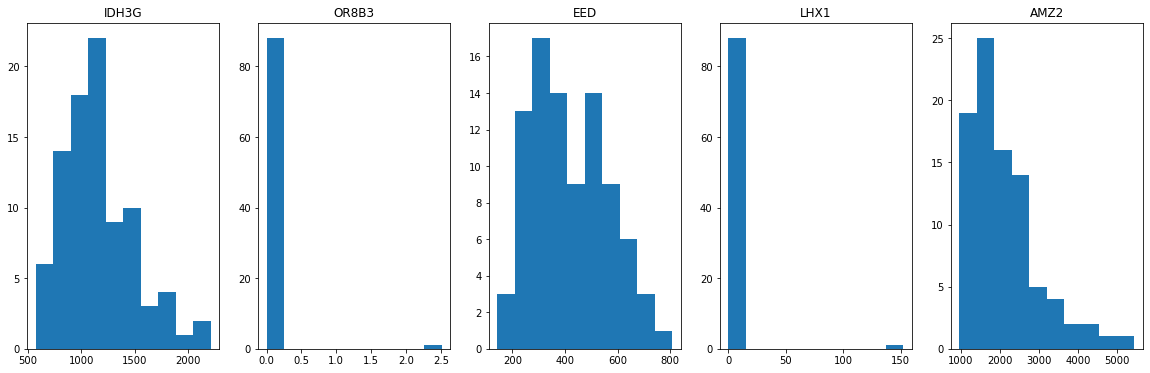

In [56]:
fig, axs = plt.subplots(1,5,figsize=(20,6))
axs[0].hist(dataset[0].IDH3G)
axs[0].set_title('IDH3G')

axs[1].hist(dataset[0].OR8B3)
axs[1].set_title('OR8B3')

axs[2].hist(dataset[0].EED)
axs[2].set_title('EED')

axs[3].hist(dataset[0].LHX1)
axs[3].set_title('LHX1')

axs[4].hist(dataset[0].AMZ2)
axs[4].set_title('AMZ2')

plt.show()

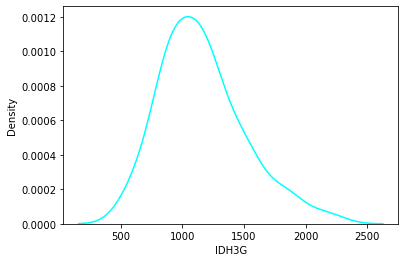

In [57]:
sns.kdeplot(dataset[0].IDH3G, color='Cyan')
plt.show()